# Web scraping from financial statement pdf's
This notebook uses `tabula` to scrape financial data from a company (Carlsberg in this example) annual report  - downloaded from the company investor relations website.

In [20]:
# We import the tabula module and pandas for manipulating the data as dataframes (tables)
import tabula
import pandas as pd

# for further examples of how to use the tabula module
# https://nbviewer.jupyter.org/github/chezou/tabula-py/blob/master/examples/tabula_example.ipynb

In [21]:
file = r'carlsberg-AR2019.pdf' # pdf is downloaded to the same folder as the notebook

A screenshot of the target page is shown below for reference.

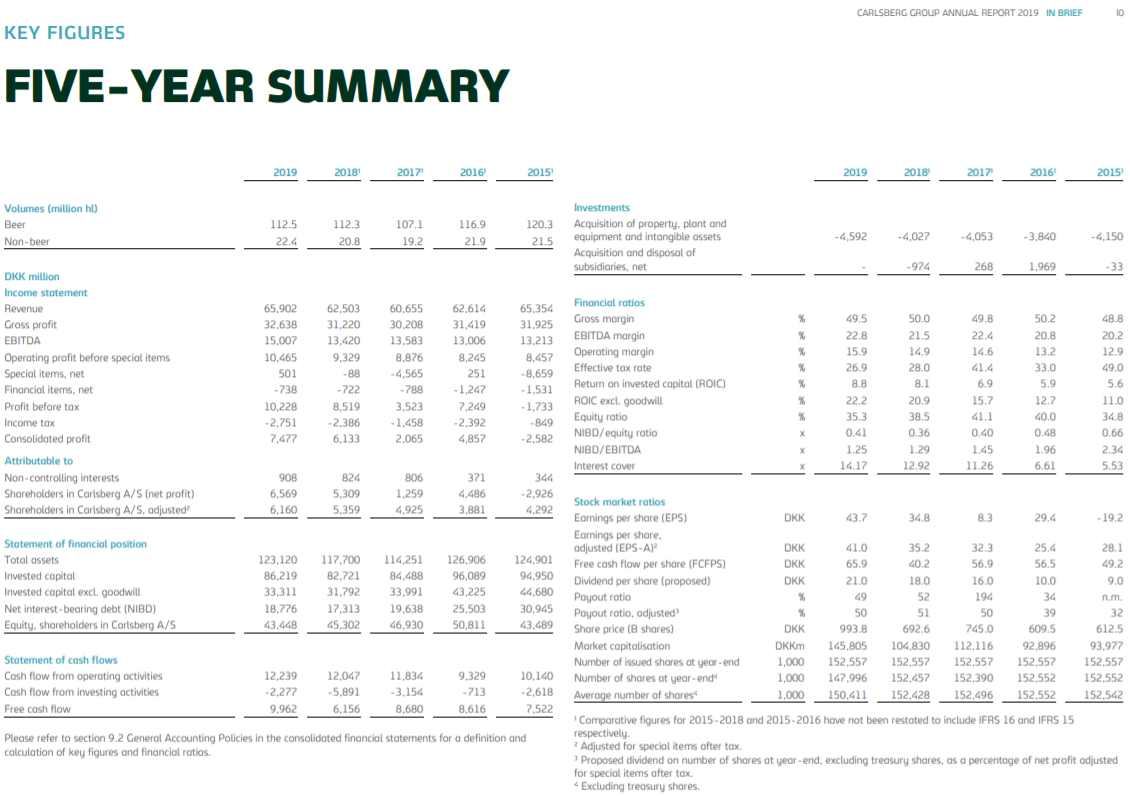

In [22]:
# first we take the table on the left - we use [0] as the .read_pdf() function returns a list

# area (top, left, bottom, right) - figured out after trial-and-error
# figures represent % of page - top-left corner = (0, 0), bottom right = (100, 100)
left_table = tabula.read_pdf(file, pages = [10], multiple_tables = False, stream = True,
                         area = [20, 5, 85, 50], relative_area = True)[0]

# stream means function ignores lines to guess table

left_table

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,2019,20181,20171,20161,20151
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Volumes (million hl),NaN,NaN,NaN,NaN,NaN
3,Beer,112.5,112.3,107.1,116.9,120.3
4,Non-beer,22.4,20.8,19.2,21.9,21.5
5,NaN,NaN,NaN,NaN,NaN,NaN
6,DKK million,NaN,NaN,NaN,NaN,NaN
7,Income statement,NaN,NaN,NaN,NaN,NaN
8,Revenue,"65,902","62,503","60,655","62,614","65,354"
9,Gross profit,"32,638","31,220","30,208","31,419","31,925"


In [23]:
# as there are so few columns, we'll manually fix the column titles
left_table.columns = ["index", 2019, 2018, 2017, 2016, 2015]
left_table.dropna(inplace = True) # we then drop all of the empty rows
left_table.set_index("index", inplace = True) # we set the index to the first column
left_table = left_table.apply(lambda x: x.str.replace(',', '').astype(float)) # we remove the commas
left_table

,2019,2018,2017,2016,2015
index,,,,,
Beer,112.5,112.3,107.1,116.9,120.3
Non-beer,22.4,20.8,19.2,21.9,21.5
Revenue,65902.0,62503.0,60655.0,62614.0,65354.0
Gross profit,32638.0,31220.0,30208.0,31419.0,31925.0
EBITDA,15007.0,13420.0,13583.0,13006.0,13213.0
Operating profit before special items,10465.0,9329.0,8876.0,8245.0,8457.0
"Special items, net",501.0,-88.0,-4565.0,251.0,-8659.0
"Financial items, net",-738.0,-722.0,-788.0,-1247.0,-1531.0
Profit before tax,10228.0,8519.0,3523.0,7249.0,-1733.0


In [24]:
# we do the same for the table on the right, with adjusted area figures
right_table = tabula.read_pdf(file, pages = [10], multiple_tables = False, stream = True,
                         area = [20, 50, 85, 100], relative_area = True)[0]
right_table

,Unnamed: 0,Unnamed: 1,2019,20181,20171,20161,20151
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Investments,NaN,NaN,NaN,NaN,NaN,NaN
2,"Acquisition of property, plant and",NaN,NaN,NaN,NaN,NaN,NaN
3,equipment and intangible assets,NaN,"-4,592","-4,027","-4,053","-3,840","-4,150"
4,Acquisition and disposal of,NaN,NaN,NaN,NaN,NaN,NaN
5,"subsidiaries, net",NaN,-,-974,268,"1,969",-33
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Financial ratios,NaN,NaN,NaN,NaN,NaN,NaN
8,Gross margin,%,49.5,50.0,49.8,50.2,48.8
9,EBITDA margin,%,22.8,21.5,22.4,20.8,20.2


In [25]:
# fix some specific row headings with the adjacent cell data
right_table.loc[3, "Unnamed: 0"] = (right_table.loc[2, "Unnamed: 0"] + 
                                    " " + right_table.loc[3, "Unnamed: 0"])
right_table.loc[5, "Unnamed: 0"] = (right_table.loc[4, "Unnamed: 0"] +
                                    " " + right_table.loc[5, "Unnamed: 0"])

# then again, fix overall fotmatting of the table
right_table.drop(right_table.columns[1], axis = 1, inplace = True)
right_table.columns = ["index", 2019, 2018, 2017, 2016, 2015]
right_table.dropna(inplace = True)
right_table.set_index("index", inplace = True)
right_table = right_table.apply(lambda x: 
                        x.str.replace(',', ''))
right_table = right_table.apply(pd.to_numeric, errors = "ignore")

right_table.loc["Acquisition and disposal of subsidiaries, net", 2019] = 0
right_table.loc["Payout ratio", 2015] = 0
right_table

,2019,2018,2017,2016,2015
index,,,,,
"Acquisition of property, plant and equipment and intangible assets",-4592,-4027.00,-4053.00,-3840.00,-4150
"Acquisition and disposal of subsidiaries, net",0,-974.00,268.00,1969.00,-33
Gross margin,49.5,50.00,49.80,50.20,48.8
EBITDA margin,22.8,21.50,22.40,20.80,20.2
Operating margin,15.9,14.90,14.60,13.20,12.9
Effective tax rate,26.9,28.00,41.40,33.00,49.0
Return on invested capital (ROIC),8.8,8.10,6.90,5.90,5.6
ROIC excl. goodwill,22.2,20.90,15.70,12.70,11.0
Equity ratio,35.3,38.50,41.10,40.00,34.8


In [27]:
final_table = pd.concat([left_table, right_table])
final_table = final_table.reindex(columns = final_table.columns.sort_values())
final_table.dtypes # not all columns are numerical, but this can easily be converted in Excel

2015     object
2016    float64
2017    float64
2018    float64
2019     object
dtype: object

In [28]:
final_table

,2015,2016,2017,2018,2019
index,,,,,
Beer,120.3,116.90,107.10,112.30,112.5
Non-beer,21.5,21.90,19.20,20.80,22.4
Revenue,65354,62614.00,60655.00,62503.00,65902
Gross profit,31925,31419.00,30208.00,31220.00,32638
EBITDA,13213,13006.00,13583.00,13420.00,15007
Operating profit before special items,8457,8245.00,8876.00,9329.00,10465
"Special items, net",-8659,251.00,-4565.00,-88.00,501
"Financial items, net",-1531,-1247.00,-788.00,-722.00,-738
Profit before tax,-1733,7249.00,3523.00,8519.00,10228


## Balance sheet

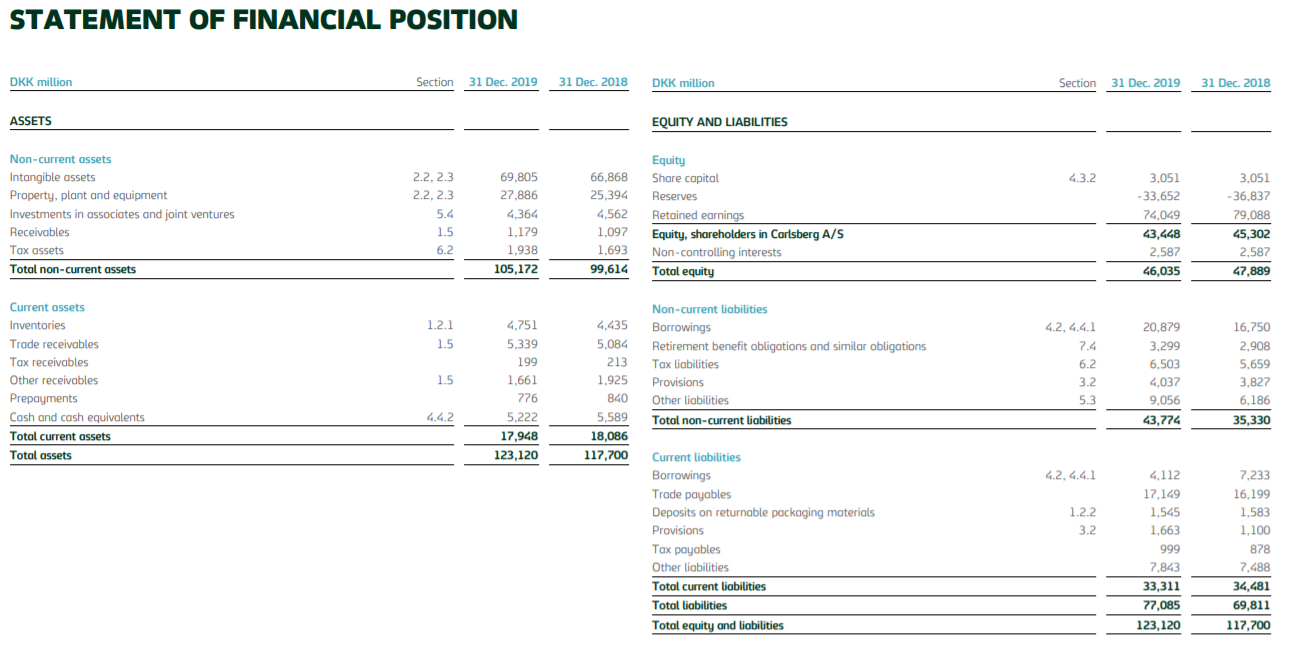

In [29]:
# stream means function ignores lines to guess table
# area (top, left, bottom, right) - figured out after trial-and-error
# figures represent % of page - top-left corner = (0, 0), bottom right = (100, 100)
bs_left_table = tabula.read_pdf(file, pages = [56], multiple_tables = False, stream = True,
                         area = [20, 5, 75, 50], relative_area = True)[0]

bs_left_table

,DKK million,Section,31 Dec. 2019,31 Dec. 2018
0,NaN,NaN,NaN,NaN
1,ASSETS,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Non-current assets,NaN,NaN,NaN
4,Intangible assets,"2.2, 2.3","69,805","66,868"
5,"Property, plant and equipment","2.2, 2.3","27,886","25,394"
6,Investments in associates and joint ventures,5.4,"4,364","4,562"
7,Receivables,1.5,"1,179","1,097"
8,Tax assets,6.2,"1,938","1,693"
9,Total non-current assets,NaN,"105,172","99,614"


In [31]:
bs_left_table.drop(columns = ["Section"], inplace = True)
bs_left_table.columns = ["index", 2019, 2018]
bs_left_table.dropna(inplace = True)
bs_left_table.set_index("index", inplace = True)
bs_left_table = bs_left_table.apply(lambda x: x.str.replace(',', '').astype(float))
bs_left_table

,2019,2018
index,,
Intangible assets,69805.0,66868.0
"Property, plant and equipment",27886.0,25394.0
Investments in associates and joint ventures,4364.0,4562.0
Receivables,1179.0,1097.0
Tax assets,1938.0,1693.0
Total non-current assets,105172.0,99614.0
Inventories,4751.0,4435.0
Trade receivables,5339.0,5084.0
Tax receivables,199.0,213.0


In [32]:
bs_right_table = tabula.read_pdf(file, pages = [56], multiple_tables = False, stream = True,
                         area = [20, 50, 90, 95], relative_area = True)[0]
# stream means function ignores lines to guess table
# area (top, left, bottom, right) - figured out after trial-and-error
# figures represent % of page - top-left corner = (0, 0), bottom right = (100, 100)
bs_right_table

,DKK million,Section,31 Dec. 2019,31 Dec. 2018
0,NaN,NaN,NaN,NaN
1,EQUITY AND LIABILITIES,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Equity,NaN,NaN,NaN
4,Share capital,4.3.2,"3,051","3,051"
5,Reserves,NaN,"-33,652","-36,837"
6,Retained earnings,NaN,"74,049","79,088"
7,"Equity, shareholders in Carlsberg A/S",NaN,"43,448","45,302"
8,Non-controlling interests,NaN,"2,587","2,587"
9,Total equity,NaN,"46,035","47,889"


In [33]:
bs_right_table.drop(columns = ["Section"], inplace = True)
bs_right_table.columns = ["index", 2019, 2018]
bs_right_table.dropna(inplace = True)
bs_right_table.set_index("index", inplace = True)
bs_right_table = bs_right_table.apply(lambda x: x.str.replace(',', '').astype(float))
bs_right_table

,2019,2018
index,,
Share capital,3051.0,3051.0
Reserves,-33652.0,-36837.0
Retained earnings,74049.0,79088.0
"Equity, shareholders in Carlsberg A/S",43448.0,45302.0
Non-controlling interests,2587.0,2587.0
Total equity,46035.0,47889.0
Borrowings,20879.0,16750.0
Retirement benefit obligations and similar obligations,3299.0,2908.0
Tax liabilities,6503.0,5659.0


In [34]:
final_bs = pd.concat([bs_left_table, bs_right_table])
final_bs = final_bs.reindex(columns = final_bs.columns.sort_values())
final_bs

,2018,2019
index,,
Intangible assets,66868.0,69805.0
"Property, plant and equipment",25394.0,27886.0
Investments in associates and joint ventures,4562.0,4364.0
Receivables,1097.0,1179.0
Tax assets,1693.0,1938.0
Total non-current assets,99614.0,105172.0
Inventories,4435.0,4751.0
Trade receivables,5084.0,5339.0
Tax receivables,213.0,199.0


## Cash flow statement

In [35]:
# stream means function ignores lines to guess table
# area (top, left, bottom, right) - figured out after trial-and-error
# figures represent % of page - top-left corner = (0, 0), bottom right = (100, 100)
cf_table = tabula.read_pdf(file, pages = [58], multiple_tables = False, stream = True,
                         area = [20, 5, 95, 50], relative_area = True)[0]

cf_table

,DKK million,Section,2019,2018
0,Operating profit before special items,NaN,"10,465","9,329"
1,"Depreciation, amortisation and impairment losses1",2.3,"4,542","4,091"
2,"Operating profit before depreciation, amortisa...",NaN,"15,007","13,420"
3,Other non-cash items,NaN,-320,143
4,Change in trade working capital,NaN,491,"1,908"
5,Change in other working capital,NaN,634,52
6,Restructuring costs paid,NaN,-445,-238
7,Interest etc. received,NaN,139,153
8,Interest etc. paid,NaN,"-1,033","-1,016"
9,Income tax paid,NaN,"-2,234","-2,375"


In [36]:
cf_table.drop(columns = ["Section"], inplace = True)
cf_table.columns = ["index", 2019, 2018]
cf_table.set_index("index", inplace = True)
cf_table = cf_table.apply(lambda x: x.str.replace(',', '').astype(float, errors = "ignore"))
cf_table = cf_table.reindex(columns = cf_table.columns.sort_values())
cf_table

,2019,2018
index,,
Operating profit before special items,10465,9329
"Depreciation, amortisation and impairment losses1",4542,4091
"Operating profit before depreciation, amortisation and impairment losses1",15007,13420
Other non-cash items,-320,143
Change in trade working capital,491,1908
Change in other working capital,634,52
Restructuring costs paid,-445,-238
Interest etc. received,139,153
Interest etc. paid,-1033,-1016


In [37]:
# finally we prepare an .xlsx file
writer = pd.ExcelWriter('Carlsberg_AR2019_data.xlsx', engine = 'xlsxwriter')

# and we write the resulting tables into it - on separate tabs
final_table.to_excel(writer, sheet_name = "Income Statement")
final_bs.to_excel(writer, sheet_name = "Balance Sheet")
cf_table.to_excel(writer, sheet_name = "Cash Flow Statement")

In [38]:
writer.save()